In [2]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re

import tools
import tools.spacy as myspacy
import tools.pandas as mypd

import processing
import processing.lexicons as lexicons
import processing.preprocess as preprocess

import spacy
from spacy_wordnet.wordnet_annotator import WordnetAnnotator 
import neuralcoref
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py
py.offline.init_notebook_mode()
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments


ImportError: DLL load failed: La procédure spécifiée est introuvable.

In [44]:

ents = pd.read_csv(r'outputs\greatex_10k.edf.csv')
data = pd.read_csv(r'outputs\greatex_10k.df.csv')

rel_cols = df.columns[list(df.columns.str.startswith('R_'))]
lex_cols = df.columns[list(df.columns.str.startswith('L_'))]


In [45]:
ents

,Unnamed: 0,categ,entity_i,entity_pos,entity_root,entity_tag,entity_text,i,mention_pos,mention_root,mention_tag,mention_text,t0,t1
0,0,unknown,NaN,NaN,UNKNOWN,NaN,NaN,21,DET,both,DT,both,0,31
1,1,unknown,NaN,NaN,UNKNOWN,NaN,NaN,56,DET,the,DT,the,46,67
2,2,unknown,NaN,NaN,UNKNOWN,NaN,NaN,69,PRON,who,WP,who,67,74
3,3,unknown,NaN,NaN,UNKNOWN,NaN,NaN,71,DET,the,DT,the,67,74
4,4,unknown,NaN,NaN,UNKNOWN,NaN,NaN,87,DET,any,DT,any,74,120
5,5,unknown,NaN,NaN,UNKNOWN,NaN,NaN,90,DET,either,DT,either,74,120
6,6,unknown,NaN,NaN,UNKNOWN,NaN,NaN,109,PRON,what,WP,what,74,120
7,7,unknown,NaN,NaN,UNKNOWN,NaN,NaN,120,DET,the,DT,The,120,151
8,8,unknown,NaN,NaN,UNKNOWN,NaN,NaN,123,DET,the,DT,the,120,151
9,9,unknown,NaN,NaN,UNKNOWN,NaN,NaN,132,DET,an,DT,an,120,151


In [47]:
data

,Unnamed: 0,L_NRCw_Em_anger,L_NRCw_Em_anticipation,L_NRCw_Em_disgust,L_NRCw_Em_fear,L_NRCw_Em_joy,L_NRCw_Em_negative,L_NRCw_Em_positive,L_NRCw_Em_sadness,L_NRCw_Em_surprise,L_NRCw_Em_trust,R_agent,R_patient,i,lemma,neg,t,text
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,my,NaN,3,father,False,0,father
1,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,my,NaN,16,infant,False,0,infant
2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,my,NaN,57,authority,False,46,authority
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,my,NaN,51,father,False,46,father
4,4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,my,NaN,82,mother,False,74,mother
5,5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,my,NaN,107,fancy,False,74,fancies
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,my,NaN,143,dark,False,120,dark
7,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,my,NaN,148,black,False,120,black
8,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,my,NaN,171,childish,False,151,childish
9,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,my,NaN,179,sickly,False,151,sickly


In [48]:
for col in list(lex_cols) + list(rel_cols):
    print(col.center(50,"-"))
    print(df[col].value_counts(dropna=False))

In [49]:
df.groupby('categ')[['i']].count()#.groupby(['R_agent','R_patient']).agg(['count'])

,i
categ,
environment,1437
person,4171
unknown,185


In [50]:
def get_entities(df):
    rel_cols = df.columns[list(df.columns.str.startswith('R_'))]
    entities = set()
    for c in rel_cols:
        ents = set(df[c].fillna('-NONE-').unique())
        entities |= ents
    return entities

entities = get_entities(df)
len(entities)

0

In [25]:
nlp = spacy.load('en_core_web_sm', disable=["textcat", "tagger", "sentencizer"])

for e in entities:
    edoc = nlp(e)
    print(repr(e), '/'.join(t.ent_type_ for t in edoc if t.ent_type_))

'the playacting' 
'a heavy mist' 
'my mother' 
'my dear sir' 
'the hunt' 
'mrs. hubble' 
'people' 
'the loaf' 
'the sergeant who had spoken to me' 
'the rampage' 
'matthew' 
'the child' 
"miss havisham's" 
'the ground' 
'this boy' 
'warning' 
'the poker' 
'the urn upon it' 
'her face' 
'a coarse apron' 
'we all' 
'her hands' 
'my mouth' 
"my 'air" 
'the' 
'her chair' 
'the poor little child' 
'your observation' 
'the marsh mist' 
'a glass of brandy' 
'frank disclosure' 
'the desolate house' 
'the coachman beginning to get down' 
"the bird's-nest under his left arm" 
'a wrist' 
'the dear fellow' 
'"the young man' 
'her marriage' 
'herbert pocket' 
'barnard' 
'roman' 
'adopted me' 
'you' 
"pumblechook's indignant stare" 
'bartholomew close' 
'our lights' 
'the church' 
'your adversary' 
'my eyes' 
'a draped table with a gilded looking-glass' 
"mrs. pocket's two nurse-maids" CARDINAL
'the assailant' 
'the name' 
'her greedy look' 
'his hat,—as' 
'me,—it' 
'his fetter' 
'this judicious par

In [266]:
pd.read_csv('outputs/frankenstein.df.csv')

,Unnamed: 0,NRCw_Em_anger,NRCw_Em_anticipation,NRCw_Em_disgust,NRCw_Em_fear,NRCw_Em_joy,NRCw_Em_negative,NRCw_Em_positive,NRCw_Em_sadness,NRCw_Em_surprise,NRCw_Em_trust,agent,lemma,neg,patient,predicative,text
0,0,False,False,False,False,True,False,True,False,False,True,NaN,found,False,NaN,NaN,founded
1,1,False,False,False,False,False,False,True,False,False,False,NaN,writer,False,NaN,NaN,writers
2,2,False,False,False,False,False,True,False,True,False,False,NaN,impossible,False,NaN,NaN,impossible
3,3,False,False,False,False,False,False,True,False,False,True,NaN,accord,False,NaN,NaN,according
4,4,False,False,False,False,False,False,True,False,False,False,NaN,degree,False,NaN,NaN,degree
5,5,False,True,False,False,True,False,True,False,False,True,NaN,faith,False,NaN,NaN,faith
6,6,False,True,False,False,True,False,True,False,False,False,NaN,fancy,False,NaN,NaN,fancy
7,7,False,False,False,False,False,False,False,False,False,True,NaN,series,False,NaN,NaN,series
8,8,False,False,False,True,False,True,False,False,False,False,NaN,terror,False,NaN,NaN,terrors
9,9,False,False,False,False,False,False,True,False,False,False,NaN,interest,False,NaN,NaN,interest


In [214]:
df_all = parse_frames(doc)
df = df_all
df.head()

AttributeError: 'NoneType' object has no attribute 'wordnet_synsets_for_domain'

In [264]:
newdf[newdf.NRCw_Em_positive & (~newdf.agent.isna() | ~newdf.patient.isna())][['agent','lemma','patient','neg','predicative']]

,agent,lemma,patient,neg,predicative
12,it,recommend,it,False,None
70,None,excite,we,False,None
113,the pole,present,the pole,False,None
214,None,hire,myself,False,None
383,the father of the girl,love,the father of the girl,False,None
399,my generous friend,reassure,his,False,None
539,last monday (july 31st),surround,last monday (july 31st),False,None
558,us,perceive,a sledge,False,None
568,None,excite,we,False,None
664,the stranger,arouse,the stranger,False,None


In [58]:
'abate' in nrclex.index

True

In [ ]:
dfm = df.merge(nrclex, how='left', left_on='predicate', right_on='term')
for col in dfm.columns:
    if col.startswith('NRCw_Em_'):
        dfm[col].fillna(False, inplace=True)
df = dfm

In [ ]:
df.groupby(['entity','relation']).sum().sort_values(by='NRCw_Em_joy_y',ascending=False)

In [ ]:
df[df.neg].predicate.value_counts()

In [ ]:
ent_cnt = df.entity.value_counts().plot(kind='bar')
#df[ent_cnt > 1 & ~df.predicate.isin(['-PRON-','be','for'])].groupby(['entity','predicate']).i.count().sort_values(ascending=False)

In [ ]:
df[(df.entity == 'the stranger')].predicate.value_counts()

In [ ]:
df.groupby('kind').i.count().sort_values(ascending=False)

In [ ]:
df[(df['stop'] == True) & (df.category == 'FUNCTION')].txt.value_counts()

In [ ]:
df[(df.i > 885) & ~df.txt.isna()]#.subj.value_counts()

In [ ]:
df['subj'].value_counts(ascending=False)

In [ ]:
df[df.kind == 'OTHER'].groupby('category').stop.value_counts(True)

In [ ]:
content_nostop = df[(df.kind == 'CONTENT') & (df.stop == False)]
content_nostop.txt.value_counts()

In [ ]:
df.category.value_counts()

In [ ]:
df[(df.category=='CONTENT') & (df.stop == False)].txt.value_counts()
#df[df.txt == 'beheld']

In [ ]:
psy_toks = [tok for tok in doc if tok._.wordnet.wordnet_synsets_for_domain(['psychological_features'])]

In [ ]:
help(psy_toks[0]._.wordnet.wordnet_synsets_for_domain(['psychological_features'])[0])

In [ ]:
for tok in psy_toks[:50]:
    print(tok)
    lbls = tok._.wordnet.wordnet_synsets_for_domain(['psychology','psychological_features'])
    print('\t', ', '.join((lbl.name()) for lbl in lbls))
    print()

In [ ]:
buf = []
for row in df_all.itertuples():
    idx,i,kind,category,txt,stop = row
    if kind == 'SEP':
        buf.append('\n')
    else:
        key = (category if kind =='OTHER' else kind)
        sym = {'PSYCH':'!', 'ENTITY':'☺', 'CONTENT':'-', 'FUNCTION':'.'}[key]
        buf.append(sym)

In [188]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
#pattern = [{"LEMMA": "be"}]
pattern = [{"DEP": "neg"}]
matcher.add("Be", None, pattern)

def printtree(tok, lvl=-1, tab='\t'):
    #print(','.join(t.text for t in tok.ancestors))
    print((lvl+1)*tab, f"{tok.text!r} ({tok.dep_}) => {tok.lemma_}")
    for t in tok.children:
        printtree(t, lvl+1, tab)
    #for t in tok.conjuncts:
    #    print((lvl+1)*tab, f"{t.text:12} ({t.dep_})")

matches = matcher(doc)
i = 0
for match_id, start, end in matches:
    break
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    tok = span[0]
    print(tok.sent.text, f"[{match_id}: '{string_id}' as '{span.text}']")
    print("- "*50)
    printtree(tok)
    print("#"*100)
    if i > 100: break
        
sent = list(nlp('I shall not be supposed as according the remotest degree of serious faith to such an imagination.').sents)[0]
printtree(sent.root)



 'supposed' (ROOT) => suppose
	 'I' (nsubjpass) => -PRON-
	 'shall' (aux) => shall
	 'not' (neg) => not
	 'be' (auxpass) => be
	 'as' (prep) => as
		 'according' (prep) => accord
			 'degree' (pobj) => degree
				 'the' (det) => the
				 'remotest' (amod) => remote
				 'of' (prep) => of
					 'faith' (pobj) => faith
						 'serious' (amod) => serious
				 'to' (prep) => to
					 'imagination' (pobj) => imagination
						 'such' (predet) => such
						 'an' (det) => an
	 '.' (punct) => .


In [ ]:
len('I shall not be supposed as according the remotest degree of serious faith to such an imagination.')

In [ ]:
for t in doc[40:60]:
    print(t, list(t._.wordnet.synsets()))

In [ ]:
ss = doc[40]._.wordnet.synsets()[0]
[l.key() for l in ss.lemmas()]

In [ ]:
doc[72].lemma_

In [41]:
NRCWordRow = namedtuple('NRCWordRow', ['term', 'emotion', 'weight'])
def load_wordlevel_lexicon():
    with open(r'..\datasets\NRC-Sentiment-Emotion-Lexicons\NRC-Sentiment-Emotion-Lexicons\NRC-Emotion-Lexicon-v0.92\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt') as f:
        lines = (x.strip() for x in f.readlines())
        lex_records = (x.split('\t') for x in lines if x)
        lex_records = [NRCWordRow(term, categ, float(flag)) for term, categ, flag in lex_records ]
    
    

    emlex = pd.DataFrame(lex_records)
    emlex_dummies = pd.get_dummies(pd.Categorical(emlex.emotion), prefix='NRCw_Em')
    emlex_dummies = emlex_dummies.multiply(emlex.weight, axis='index')
    emlex.pop('emotion')
    emlex.pop('weight')
    emlex = pd.concat([emlex, emlex_dummies], axis=1)

    emlex = emlex.groupby('term').sum()
    return emlex
    
    
def load_senselevel_lexicon():
    with open(r'..\datasets\NRC-Sentiment-Emotion-Lexicons\NRC-Sentiment-Emotion-Lexicons\NRC-Emotion-Lexicon-v0.92\NRC-Emotion-Lexicon-Senselevel-v0.92.txt') as f:
        lex_records = (x.strip().split('\t') for x in f.readlines())
        lex_records = ((x[0].split("--"), x[1], x[2] == '1') for x in lex_records)
        lex_records = [(x[0][0], [s.strip() for s in x[0][1].split(",")], x[1], x[2]) for x in lex_records]
        return lex_records
    
nrclex = load_wordlevel_lexicon()
nrclex.head()

,NRCw_Em_anger,NRCw_Em_anticipation,NRCw_Em_disgust,NRCw_Em_fear,NRCw_Em_joy,NRCw_Em_negative,NRCw_Em_positive,NRCw_Em_sadness,NRCw_Em_surprise,NRCw_Em_trust
term,,,,,,,,,,
aback,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abacus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


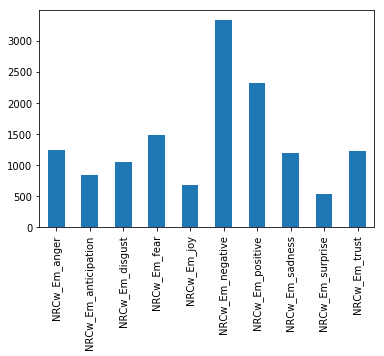

In [47]:
#pd.get_dummies(pd.Categorical(nrclex.emotion), prefix='NRCw_Em').multiply(nrclex.weight, axis='index').query('NRCw_Em_anger>0')
nrclex.sum().plot(kind='bar')

In [ ]:
from nltk.corpus import wordnet as wn
#wn.lemma_from_key('WID-00002621-R-??-hardly')

def get_sense_map(lex_records):
    smap = defaultdict(lambda: defaultdict(Counter))
    for sense, synonyms, *_ in lex_records:
        syns0, *candidates = wn.synsets(sense)
        candidates.extend([s for syn in synonyms for s in wn.synsets(syn)])
        candidates = [h for s in candidates for h in syns0.lowest_common_hypernyms(s)]
        smap[sense][frozenset(synonyms)] += Counter(c.name() for c in candidates)
    return smap

def get_senses(lex_records):
    for sense, synonyms, emotion, sentiment in lex_records:
        syns0, *candidates = wn.synsets(sense)
        candidates.extend([s for syn in synonyms for s in wn.synsets(syn)])
        candidates = [h for s in candidates for h in syns0.lowest_common_hypernyms(s)]
        cnt = Counter(s.name() for s in candidates)
        if cnt:
            syns = cnt.most_common(1)
            n = len(cnt.keys())
        else:
            sys = syns0
            n = 1
        yield sense, synonyms, syns, cnt, emotion, sentiment

i=0
for sense, synonyms, syns, cnt, emotion, sentiment in get_senses(lex_records):
    break
    print(repr(sense), repr(synonyms))
    print("\t", str(cnt)[7:])#, "=>", cnt)#syns, f"({n})")
    i+= 1
    if i > 50:
        break
        
for k, v in get_sense_map(lex_records[:500]).items():
    print(f"{k:15}", end=" ")
    for kk, vv in v.items():
        kkf = ','.join(kk)
        print(f"{kkf:30}", end=" ")
        print("|".join(f"{vvk}[{vvc}]" for vvk, vvc in vv.most_common()), end=" "*15)
    if v:
        print()
        

In [36]:
from sys import getsizeof
locs = pd.DataFrame([{'var':k, 's':getsizeof(v)} for k,v in locals().items()])
#locs.rename(index=str, columns={0:'var', 1:'size'})
locs.sort_values(by='s',ascending=False,inplace=True)
locs

,s,var
127,11477850,df
126,11477850,df_all
103,5123791,_4
102,5123791,wnfeel
143,2008970,_15
145,1418304,_16
106,846496,txt
158,88104,_23
136,65741,_11
133,13684,nrclex


In [119]:
spacy.__version__

'2.1.3'

In [92]:
deps = []
for clust in parse_book(txt[:10_000])._.coref_clusters:
    main = clust.main
    for mention in clust.mentions:
        deps.append({'txt': mention.text,'root':mention.root.text,'rootdep':mention.root.dep_, **{t.dep_:1 for t in mention}})
        
deps=pd.DataFrame(deps)

10000 char to parse
[LexiconTagger] 593 matches
[NegTagger] 12 matches


In [93]:
deps.fillna(0)

,det,dobj,nsubj,nsubjpass,nummod,pobj,poss,prep,root,rootdep,txt
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,It,nsubjpass,It
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,it,nsubj,it
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,story,nsubj,my story
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,It,nsubjpass,It
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,we,nsubj,we
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ourselves,dobj,ourselves
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,our,poss,our
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,us,pobj,us
8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,friends,nsubj,my two friends
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,they,nsubj,they


In [231]:
for clust in doc._.coref_clusters:
    print(clust.main.text)
    for k, v in Counter(m.text.lower() for m in clust.mentions).most_common():
        print(' '*4,k, f"({v})" if v > 1 else "")

My father
     my father (2)
     he 
Pirrip
     pirrip (2)
     his 
Pip
     pip (2)
my father or my mother
     their (2)
     my father or my mother 
     them 
     they 
their
     their (4)
     they 
     them 
the river
     the river (2)
the sea
     the sea (2)
A man with no hat, and with broken shoes, and with an old rag tied round his head
     a man with no hat, and with broken shoes, and with an old rag tied round his head 
     his 
     he 
his head
     his head (2)
sir
     the man (5)
     sir (3)
     me (2)
     myself (2)
     his 
us
     us (2)
your name
     your name 
     it 
the church
     the church (3)
     itself 
my pockets
     my pockets 
     them 
a piece of bread
     a piece of bread 
     it 
     the bread 
itself,—for
     he (3)
     itself,—for 
em
     he (2)
     em 
     his 
your mother
     your mother 
     my mother 
sir
     he (10)
     sir (6)
     him (2)
     his 
"Blacksmith
     he (4)
     his (4)
     "blacksmith 
both arms
